<a href="https://colab.research.google.com/github/Mh-Dihan/Mechine-Learning-Projects/blob/main/CarPricePrediction_CSE445_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**



In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
#Loading the KNN Regressor model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#Loading the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
#Loading the Support Vector Regressor model
from sklearn.svm import SVR
#Loading the Polynomial Regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

**Data Collection and Processing**

In [88]:
# loading the data from csv file to pandas dataframe
car_data = pd.read_csv('/content/car_data.csv')

In [89]:
#inspecting the 5 first 5 rows of the dataframe
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [90]:
#checking the number of rows and columns
car_data.shape

(301, 9)

In [91]:
#getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [92]:
#checking the number of missing value
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [93]:
#checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**Encoding the Categorical Data**


In [94]:
#encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


#encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-917822609.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-917822609.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-917822609.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

In [95]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Splitting the data and Target**




In [96]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [97]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [98]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


**Splitting Training and Test data**

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1,random_state=2)

**Model Training**

1.**Linear Regrassion**

In [100]:
#Loading the linear regrassion model
lin_reg_model = LinearRegression()

In [101]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [102]:
#prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [103]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


In [104]:
# ----- Training Metrics -----
print("Linear Regression - Train MSE      :", metrics.mean_squared_error(Y_train, lin_reg_model.predict(X_train)))
print("Linear Regression - Train RMSE     :", np.sqrt(metrics.mean_squared_error(Y_train, lin_reg_model.predict(X_train))))
print("Linear Regression - Train Accuracy :", metrics.r2_score(Y_train, lin_reg_model.predict(X_train)) * 100)

Linear Regression - Train MSE      : 3.2590308233090868
Linear Regression - Train RMSE     : 1.8052785999144527
Linear Regression - Train Accuracy : 87.99451660493712


**Visualize the actual prices and Predicted price**

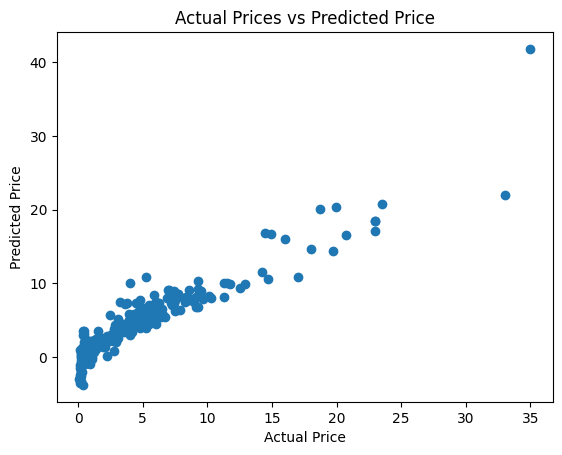

In [105]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [106]:
#prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [107]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


In [108]:
# ----- Test Metrics -----
print("Linear Regression - Test MSE       :", metrics.mean_squared_error(Y_test, lin_reg_model.predict(X_test)))
print("Linear Regression - Test RMSE      :", np.sqrt(metrics.mean_squared_error(Y_test, lin_reg_model.predict(X_test))))
print("Linear Regression - Test Accuracy  :", metrics.r2_score(Y_test, lin_reg_model.predict(X_test)) * 100)

Linear Regression - Test MSE       : 2.1501299189836294
Linear Regression - Test RMSE      : 1.4663321311979867
Linear Regression - Test Accuracy  : 83.65766715027051


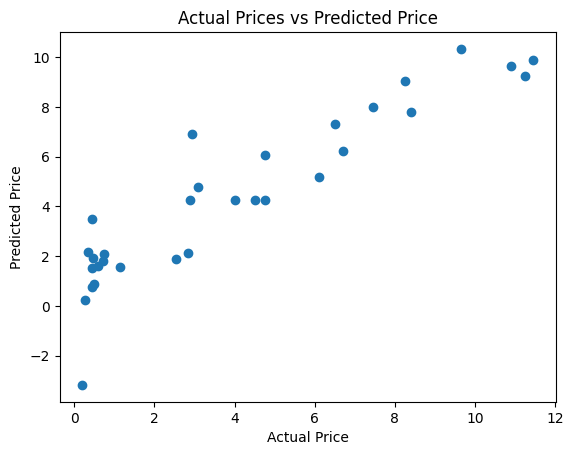

In [109]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

2.**Lasso Regrassion**

In [110]:
#Loading the lasso regrassion model
lass_reg_model = Lasso()

In [111]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

**Model Evaluation**

In [112]:
#prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [113]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


In [114]:
# ----- Training Metrics -----
print("Lasso - Train MSE      :", metrics.mean_squared_error(Y_train, lass_reg_model.predict(X_train)))
print("Lasso - Train RMSE     :", np.sqrt(metrics.mean_squared_error(Y_train, lass_reg_model.predict(X_train))))
print("Lasso - Train Accuracy :", metrics.r2_score(Y_train, lass_reg_model.predict(X_train)) * 100)

Lasso - Train MSE      : 4.267770970810244
Lasso - Train RMSE     : 2.065858410155508
Lasso - Train Accuracy : 84.27856123435794


**Visualize the actual prices and Predicted price**



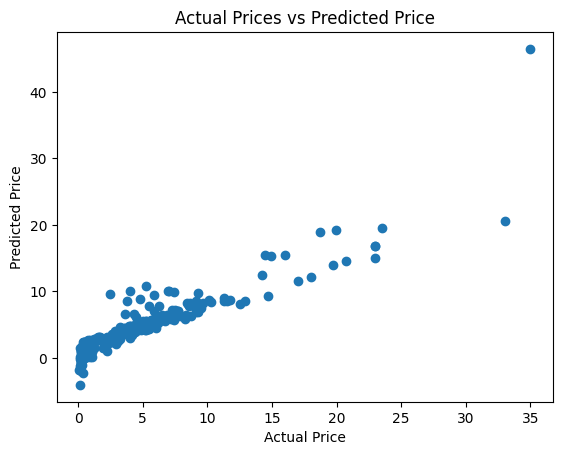

In [115]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [116]:
#prediction on training data
test_data_prediction = lass_reg_model.predict(X_test)

In [117]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


In [118]:
# ----- Test Metrics -----
print("Lasso - Test MSE       :", metrics.mean_squared_error(Y_test, lass_reg_model.predict(X_test)))
print("Lasso - Test RMSE      :", np.sqrt(metrics.mean_squared_error(Y_test, lass_reg_model.predict(X_test))))
print("Lasso - Test Accuracy  :", metrics.r2_score(Y_test, lass_reg_model.predict(X_test)) * 100)


Lasso - Test MSE       : 1.6983234006965484
Lasso - Test RMSE      : 1.3031973759552113
Lasso - Test Accuracy  : 87.09167941173195


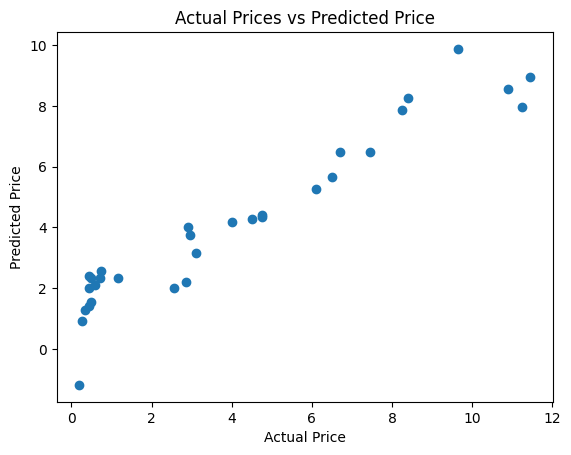

In [119]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

3.**KNN Regrassion**





In [120]:
knn_reg_model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))   # you can change neighbors
])

In [121]:
knn_reg_model.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

**Model Evaluation**

In [122]:
#prediction on Training data
training_data_prediction = knn_reg_model.predict(X_train)

In [123]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.93806914027098


In [124]:
# ----- Training Metrics -----
print("KNN - Train MSE      :", metrics.mean_squared_error(Y_train, knn_reg_model.predict(X_train)))
print("KNN - Train RMSE     :", np.sqrt(metrics.mean_squared_error(Y_train, knn_reg_model.predict(X_train))))
print("KNN - Train Accuracy :", metrics.r2_score(Y_train, knn_reg_model.predict(X_train)) * 100)

KNN - Train MSE      : 1.6811866222222218
KNN - Train RMSE     : 1.2966058083404617
KNN - Train Accuracy : 93.806914027098


**Visualize the actual prices and Predicted price**

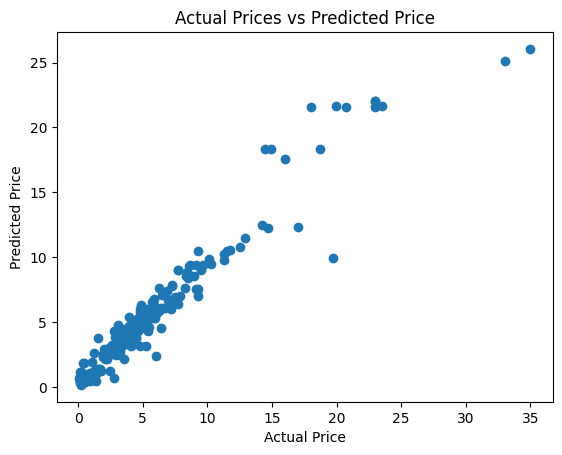

In [125]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [126]:
#prediction on training data
test_data_prediction = knn_reg_model.predict(X_test)

In [127]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.85466139322966


In [128]:
# ----- Test Metrics -----
print("KNN - Test MSE       :", metrics.mean_squared_error(Y_test, knn_reg_model.predict(X_test)))
print("KNN - Test RMSE      :", np.sqrt(metrics.mean_squared_error(Y_test, knn_reg_model.predict(X_test))))
print("KNN - Test Accuracy  :", metrics.r2_score(Y_test, knn_reg_model.predict(X_test)) * 100)

KNN - Test MSE       : 1.9121926451612905
KNN - Test RMSE      : 1.382820539752462
KNN - Test Accuracy  : 85.466139322966


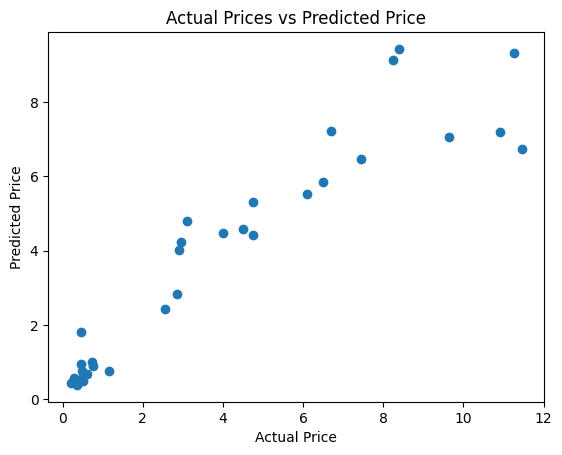

In [129]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

**4.Decision Tree Regressor**

In [130]:
dt_reg_model = DecisionTreeRegressor(random_state=42)

In [131]:
dt_reg_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

**Model Evaluation**

In [132]:
#prediction on Training data
training_data_prediction = dt_reg_model.predict(X_train)

In [133]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


In [134]:
print("Decision Tree - Train MSE      :", metrics.mean_squared_error(Y_train, dt_reg_model.predict(X_train)))
print("Decision Tree - Train RMSE     :", np.sqrt(metrics.mean_squared_error(Y_train, dt_reg_model.predict(X_train))))
print("Decision Tree - Train Accuracy :", metrics.r2_score(Y_train, dt_reg_model.predict(X_train)) * 100)

Decision Tree - Train MSE      : 3.4238754566884194e-35
Decision Tree - Train RMSE     : 5.8513891142945016e-18
Decision Tree - Train Accuracy : 100.0


**Visualize the actual prices and Predicted price**

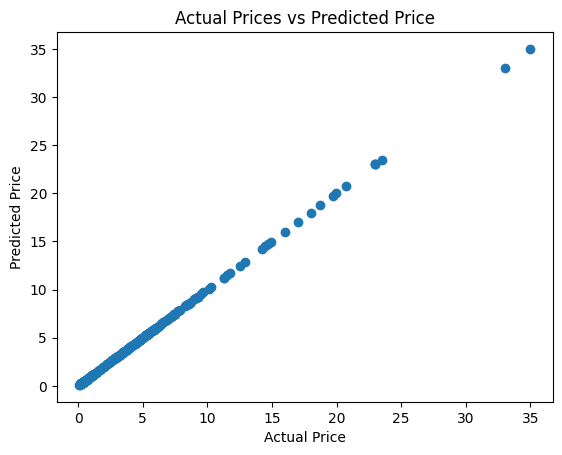

In [135]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [136]:
#prediction on training data
test_data_prediction = dt_reg_model.predict(X_test)

In [137]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9525784699755273


In [138]:
# ----- Test Metrics -----
print("Decision Tree - Test MSE       :", metrics.mean_squared_error(Y_test, dt_reg_model.predict(X_test)))
print("Decision Tree - Test RMSE      :", np.sqrt(metrics.mean_squared_error(Y_test, dt_reg_model.predict(X_test))))
print("Decision Tree - Test Accuracy  :", metrics.r2_score(Y_test, dt_reg_model.predict(X_test)) * 100)

Decision Tree - Test MSE       : 0.623916129032258
Decision Tree - Test RMSE      : 0.7898836173970555
Decision Tree - Test Accuracy  : 95.25784699755273


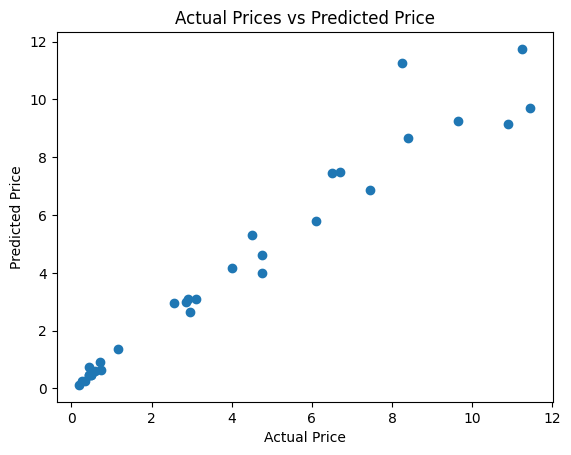

In [139]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

**5.Support Vector Regression (SVR)**

In [140]:
svr_reg_model = Pipeline(steps=[
    ("scaler", StandardScaler()),          # scaling is important for SVR
    ("svr", SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
])

In [141]:
svr_reg_model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=100, gamma=0.1))])

**Model Evaluation**

In [142]:
#prediction on Training data
training_data_prediction = svr_reg_model.predict(X_train)

In [143]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9908316319879111


In [144]:
#MSE
print("SVR - Train MSE :", metrics.mean_squared_error(Y_train, svr_reg_model.predict(X_train)))
#RMSE
print("Support Vector Regression - Train RMSE     :", np.sqrt(metrics.mean_squared_error(Y_train, svr_reg_model.predict(X_train))))
#Accuracy
print("Support Vector Regression - Train Accuracy :", metrics.r2_score(Y_train, svr_reg_model.predict(X_train)) * 100)

SVR - Train MSE : 0.2488862211339744
Support Vector Regression - Train RMSE     : 0.49888497785960084
Support Vector Regression - Train Accuracy : 99.08316319879111


**Visualize the actual prices and Predicted price**

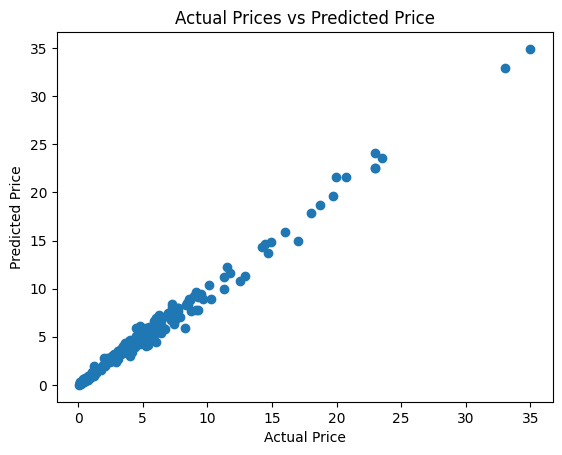

In [145]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [146]:
#prediction on training data
test_data_prediction = svr_reg_model.predict(X_test)

In [147]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9708032450136517


In [148]:
# Test MSE
print("SVR - Test MSE      :", metrics.mean_squared_error(Y_test, svr_reg_model.predict(X_test)))
# Test RMSE
print("SVR - Test RMSE     :", np.sqrt(metrics.mean_squared_error(Y_test, svr_reg_model.predict(X_test))))
# Test Accuracy (%)
print("SVR - Test Accuracy :", metrics.r2_score(Y_test, svr_reg_model.predict(X_test)) * 100)

SVR - Test MSE      : 0.3841362002024161
SVR - Test RMSE     : 0.6197872217159822
SVR - Test Accuracy : 97.08032450136517


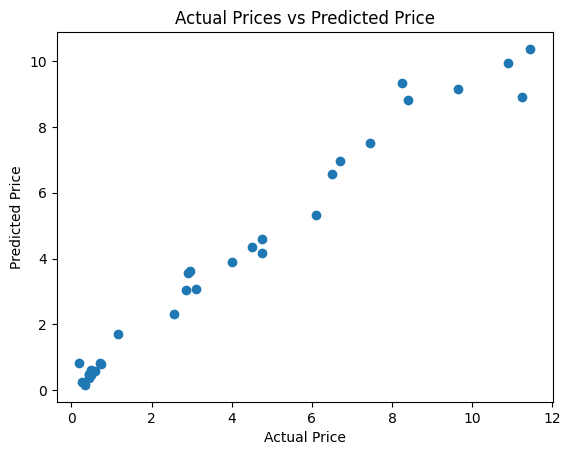

In [149]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

**6.Polynomial Regression**

In [150]:
poly_reg_model = Pipeline(steps=[
    ("poly_features", PolynomialFeatures(degree=2)),   # you can change degree=2,3,4...
    ("lin_reg", LinearRegression())
])

In [151]:
poly_reg_model.fit(X_train, Y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

**Model Evaluation**

In [152]:
#prediction on Training data
training_data_prediction = poly_reg_model.predict(X_train)

In [153]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9818367313912966


In [154]:
#MSE
mse = metrics.mean_squared_error(Y_train, training_data_prediction)
print("Polynomial Regression MSE : ", mse)
#RMSE
rmse = np.sqrt(mse)
print("Polynomial Regression RMSE : ", rmse)
# Accuracy (R² × 100)
accuracy = metrics.r2_score(Y_train, training_data_prediction) * 100
print("Polynomial Regression Accuracy (%) : ", accuracy)

Polynomial Regression MSE :  0.4930634635848987
Polynomial Regression RMSE :  0.702184778804624
Polynomial Regression Accuracy (%) :  98.18367313912965


**Visualize the actual prices and Predicted price**

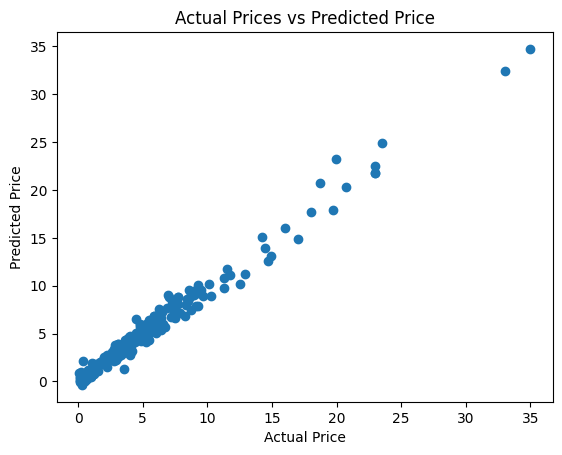

In [155]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [156]:
#prediction on training data
test_data_prediction = poly_reg_model.predict(X_test)

In [157]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9733314132956444


In [158]:
#  MSE
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
print("Polynomial Regression MSE : ", mse)
#  RMSE
rmse = np.sqrt(mse)
print("Polynomial Regression RMSE : ", rmse)
# Accuracy
print("Polynomial Regression Accuracy (%) :", metrics.r2_score(Y_test, test_data_prediction) * 100)

Polynomial Regression MSE :  0.3508735668114425
Polynomial Regression RMSE :  0.5923458169105632
Polynomial Regression Accuracy (%) : 97.33314132956444


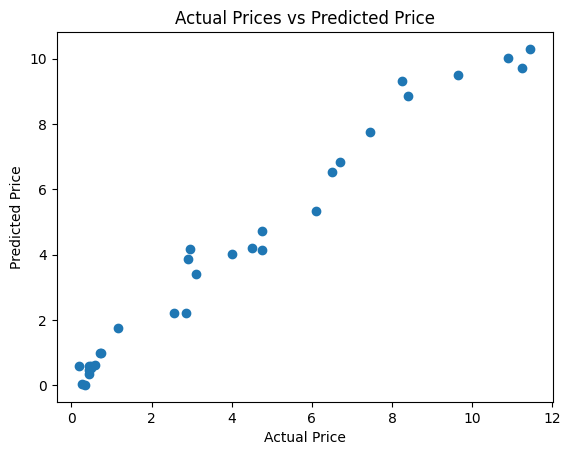

In [159]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()